In [75]:
import pandas as pd
import numpy as np
import re
import os
from argparse import Namespace
from tqdm.notebook import tqdm
import seaborn as sns

In [62]:
args = Namespace(
    rawCSV = "roi_data.csv",
    contextual_data = "context.json",
    modifiedCSV = "roi_data_new.csv",
)

## Modified the csv and separate the contextual_data

In [74]:
badLines = []
with open(args.rawCSV,"r") as f:
    lines = f.readlines()
    modifiedLines = []
    dicts = []
    for i in tqdm(range(len(lines)), desc='Load CSV Lines'):
        line = lines[i]
        if not i:
            modifiedLines.append(line.replace("contextual_data,",""))
        else:
            findit = re.findall("\"\{.*\}\"",line)
            if len(findit):
                dictstr = findit[0]
                dicts.append(json.loads(dictstr))
                newline = line.replace(dictstr,"").replace(",,",",")
                modifiedLines.append(newline)
            else:
                badLines.append(i)
                continue
with open(args.contextual_data, 'w') as f:
    json.dump(dicts, f)

with open(args.modifiedCSV, 'w') as f:
    f.writelines(modifiedLines)

for i in badLines:
    print(lines[i])

Load CSV Lines:   0%|          | 0/1382864 [00:00<?, ?it/s]

4056142051629983651,2022-11-30 16:54:12,2022-11-30,3,1,4131,17250,0,19661050,11140120,60231,70007,80171,20005,30009,0,465650,0,80212,40011,0,1,nulls,0,2,43000,"","","","","","","",0,0,0.0,0.0,0.0,{},"",0,0.0



In [70]:
df = pd.read_csv(args.modifiedCSV)

In [81]:
df["roi"]=df.apply(lambda x: int(x["conversion_roi"]+0.5),axis=1)

     mm_auction_id
roi               
0          1363729
1            14994
2             2956
3              767
4              319
5               97


<AxesSubplot:xlabel='conversion_roi', ylabel='Count'>

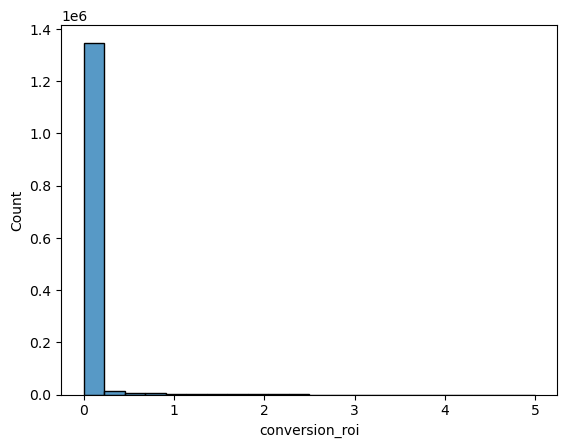

In [84]:
table = pd.pivot_table(df, values='mm_auction_id', index=['roi'],aggfunc='count')
print(table)
sns.histplot(data=df, x="conversion_roi")

In [86]:
for name in df.columns:
    print("{} {:0.2f}".format(name,len(df[name].unique())/df.shape[0]))

mm_auction_id 0.99
imp_timestamp 0.53
impression_date 0.00
day_of_week 0.00
day_part 0.00
exchange_id 0.00
publisher_id 0.01
site_id 0.03
size 0.00
creative_id 0.00
country_id 0.00
region_id 0.00
dma_id 0.00
conn_speed 0.00
isp_id 0.00
category_id 0.00
deal_id 0.00
fold_position 0.00
browser_id 0.00
os_id 0.00
browser_language_id 0.00
channel_type 0.00
overlapped_brain_pixel_selections 0.12
hashed_app_id 0.00
id_vintage 0.00
device_id 0.00
browser 0.00
browser_version 0.00
os 0.00
os_version 0.00
device_model 0.00
device_manufacturer 0.00
device_type 0.00
viewability_autotag 0.00
cross_device_flag 0.00
exchange_viewability_rate 0.00
exchange_ctr 0.05
exchange_vcr 0.00
base_domain 0.01
num_device_ids 0.00
conversion_roi 0.01
roi 0.00


In [93]:
def sortFunc(e):
    return len(e[1])
nameList = [(name,list(df[name].unique())) for name in df.columns]
nameList.sort(reverse=True, key=sortFunc)

In [106]:
def printSummary(namelist,skipNames):
    dfTemp = None
    modifiedList = [ _ for _ in nameList if _[0] not in skipNames]
    for i in tqdm(range(len(modifiedList[0][1])), desc='Generate rows'):
        result = {}
        for val in modifiedList:
            result[val[0]] = [val[1][i] if i<len(val[1]) else None]
        if dfTemp is None:
            dfTemp = pd.DataFrame.from_dict(result)
        else:
            dfTemp = pd.concat([dfTemp, pd.DataFrame.from_dict(result)])
    return dfTemp

dfTemp=printSummary(nameList,["mm_auction_id","imp_timestamp","overlapped_brain_pixel_selections","exchange_ctr"])
dfTemp.iloc[1,:]

Generate rows:   0%|          | 0/34900 [00:00<?, ?it/s]

site_id                                              300695
base_domain                                      sfgate.com
publisher_id                                         157076
conversion_roi                                        0.385
hashed_app_id                                             0
device_model                 ma_DesktopMake:mo_DesktopModel
browser_version                  br_ChromeMobile:ve_107.0.0
deal_id                                                   0
category_id                                       432963713
os_version                             os_Android:ve_13.0.0
dma_id                                                80029
exchange_viewability_rate                              65.0
device_manufacturer                          ma_DesktopMake
browser_language_id                                   28261
region_id                                             70016
exchange_id                                               3
isp_id                                  

In [ ]:
colname = "device_model"
colname = "dma_id"
dfTemp[colname] = dfTemp.apply(lambda x: "" if pd.isnull(x[colname]) else "{}".format(x[colname]),axis=1)
a=list(dfTemp[colname].unique())
a.sort(reverse=True)
a

In [129]:
dfTemp.columns

Index(['site_id', 'base_domain', 'publisher_id', 'conversion_roi',
       'hashed_app_id', 'device_model', 'browser_version', 'deal_id',
       'category_id', 'os_version', 'dma_id', 'exchange_viewability_rate',
       'device_manufacturer', 'browser_language_id', 'region_id',
       'exchange_id', 'isp_id', 'browser', 'impression_date', 'os',
       'browser_id', 'size', 'day_of_week', 'creative_id', 'os_id', 'roi',
       'id_vintage', 'device_id', 'device_type', 'day_part', 'conn_speed',
       'fold_position', 'channel_type', 'num_device_ids', 'country_id',
       'cross_device_flag', 'viewability_autotag', 'exchange_vcr'],
      dtype='object')

In [ ]:
keys = []
for i in tqdm(range(len(dicts)), desc='Generate keys'):
    mydict = dicts[i]
    keys = keys+list(json.loads(mydict).keys())
list(set(keys))

Generate keys:   0%|          | 0/1382862 [00:00<?, ?it/s]

In [151]:
list(set(keys))

['24', '26', '27', '29', '25', '28']

In [147]:
mydict

'{"28" : {"3" : {"matched" : ["51000006"]},"2" : {},"6" : {},"8" : {}},"24":{"1":{"targeted":[],"untargeted":["br_in-App"]}},"25":{"1":{"targeted":[],"untargeted":["os_Android:ve_12.0.0"]}},"29":{"1":{"targeted":[],"untargeted":["ma_Generic:mo_Android 4.0"]}},"26":{"1":{"targeted":[],"untargeted":["fo_Feature Phone"]}}}'

In [152]:
json.loads(mydict)

{'27': {'1027': {'matched': []}},
 '28': {'2': {},
  '3': {'matched': ['51000006']},
  '9': {},
  '1': {},
  '7': {},
  '6': {},
  '8': {}},
 '24': {'1': {'targeted': [], 'untargeted': ['br_Chrome:ve_107.0.0']}},
 '25': {'1': {'targeted': [], 'untargeted': ['os_Windows:ve_10.0.0']}},
 '29': {'1': {'targeted': [],
   'untargeted': ['ma_Desktop Make:mo_Desktop Model']}},
 '26': {'1': {'targeted': [], 'untargeted': ['fo_Desktop']}}}